In [130]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [131]:
# df_xsum = pd.read_csv('/scratch/ramprasad.sa/probing_summarization_factuality/metric_scores/attn_scores_mistral7b_XSUM.csv')
# df_xsum.head()


df_mistral_xsum = pd.read_csv('/scratch/ramprasad.sa/probing_summarization_factuality/metric_scores/Genaudit/attn_scores_max_mistral7b_XSUM.csv')
df_mistral_xsum['model'] = ['mistral7b'] * len(df_mistral_xsum)  
df_mistral_xsum.head()


df_llama_xsum = pd.read_csv('/scratch/ramprasad.sa/probing_summarization_factuality/metric_scores/Genaudit/attn_scores_max_llama7b_XSUM.csv')
df_llama_xsum['model'] = ['llama7b'] * len(df_llama_xsum)  
df_llama_xsum.head()


df_mistral_acibench = pd.read_csv('/scratch/ramprasad.sa/probing_summarization_factuality/metric_scores/Genaudit/attn_scores_max_mistral7b_ACIBENCH.csv')
df_mistral_acibench['model'] = ['mistral7b'] * len(df_mistral_acibench)  
df_mistral_acibench.head()


df_llama_acibench = pd.read_csv('/scratch/ramprasad.sa/probing_summarization_factuality/metric_scores/Genaudit/attn_scores_max_llama7b_ACIBENCH.csv')
df_llama_acibench['model'] = ['llama7b'] * len(df_llama_acibench)  
df_llama_acibench.head()

# df_falcon_xsum = pd.read_csv('/scratch/ramprasad.sa/probing_summarization_factuality/metric_scores/Genaudit/attn_scores_falcon7b_XSUM.csv')
# df_falcon_xsum['model'] = ['falcon7b'] * len(df_falcon_xsum)
# df_falcon_xsum.head()

df_all_models_xsum = pd.concat([df_mistral_xsum, df_llama_xsum])
df_all_models_xsum.head()
labels = list(df_all_models_xsum['labels'].values)
labels = ['consistent' if each == 0 else 'inconsistent' for each in labels]
df_all_models_xsum['labels'] = labels

df_all_models_acibench = pd.concat([df_mistral_acibench, df_llama_acibench])
df_all_models_acibench.head()
labels = list(df_all_models_acibench['labels'].values)
labels = ['consistent' if each == 0 else 'inconsistent' for each in labels]
df_all_models_acibench['labels'] = labels

In [132]:
df_all_models_xsum['attn_ign_source'] = [each*100 for each in df_all_models_xsum['attn_ign_source']]
df_all_models_xsum['attn_ign_summ'] = [each*100 for each in df_all_models_xsum['attn_ign_summ']]

df_all_models_acibench['attn_ign_source'] = [each*100 for each in df_all_models_acibench['attn_ign_source']]
df_all_models_acibench['attn_ign_summ'] = [each*100 for each in df_all_models_acibench['attn_ign_summ']]

In [133]:
# np.mean(df_xsum['attn_src_tgt'])
np.mean(df_all_models_xsum['attn_ign_summ'])

0.023040421425450087

In [139]:
''' What is the proportion of source token paid attention to 
(greater than 0.2 mass) when comparing factual vs nonfactual.
Does it change by layers? 
Hypothetically factual tokens should pay more attention to source tokens than 
nonfactual tokens'''
def viz_lineplot_attn_src(df, yticks):
    label_palettes = { 'consistent': '#89B3CC', 'inconsistent': '#BF4F51'}
    unique_models = set(df['model'].values)
    fig, axes = plt.subplots(1, len(unique_models), figsize=(8,4))
    fig.suptitle('Proportion of source tokens paid attn to')
    
    for model_idx, model in enumerate(['mistral7b', 'llama7b']):
        df_model = df[df['model'] == model]
        sns.lineplot(x='layer', 
                    y='attn_ign_source', 
                    hue='labels', 
                    data=df_model, 
                    ax=axes[model_idx], 
                    palette = label_palettes,
                    ci = None
                )
        axes[model_idx].set_title(f'{model}')
        # axes[model_idx].set_ylabel('% of times generated token has already been predicted')
        axes[model_idx].tick_params(axis='x', rotation=45)
        axes[model_idx].set_yticks(yticks)
        axes[model_idx].set_ylabel('Attn-ign-Src')
        axes[model_idx].set_xticks([i for i in range(0, 33, 2)])
        axes[model_idx].set_xlabel('')
        if model_idx == 0:
            axes[model_idx].legend().set_visible(False)
        if model_idx != 0:
            axes[model_idx].set_ylabel('')

    fig.text(0.55, 0.0, 'Layer', ha='center', fontsize = 13)
    plt.savefig('attention_ign_src.pdf')
    plt.tight_layout() 
    plt.show()
    

# sns.lineplot(x = 'layer',
#             y = 'attn_ign_source',
#            data = df_llama_xsum,
#            hue = 'labels')
# yticks = [i for i in [x * 0.1 for x in range(0,6)]]
# viz_lineplot_attn_summ(df_all_models_xsum, yticks)
# yticks = [i for i in [x * 0.02 for x in range(0,9)]]
# viz_lineplot_attn_summ(df_all_models_acibench, yticks)

In [140]:
''' What is the proportion of source token paid attention to 
(greater than 0.2 mass) when comparing factual vs nonfactual.
Does it change by layers? 
Hypothetically factual tokens should pay more attention to source tokens than 
nonfactual tokens'''
def viz_lineplot_attn_summ(df, yticks):
    label_palettes = { 'consistent': '#89B3CC', 'inconsistent': '#BF4F51'}
    unique_models = set(df['model'].values)
    fig, axes = plt.subplots(1, len(unique_models), figsize=(8,4))
    # fig.suptitle('Factual vs nonfactual that have already been predicted via early exit(First token of a word)')
    fig.suptitle('Proportion of summarry tokens paid attn to')
    for model_idx, model in enumerate(['mistral7b', 'llama7b']):
        df_model = df[df['model'] == model]
        sns.lineplot(x='layer', 
                    y='attn_ign_summ', 
                    hue='labels', 
                    data=df_model, 
                    ax=axes[model_idx], 
                    palette = label_palettes,
                    ci = None
                )
        axes[model_idx].set_title(f'{model}')
        # axes[model_idx].set_ylabel('% of times generated token has already been predicted')
        axes[model_idx].set_yticks(yticks)
        axes[model_idx].tick_params(axis='x', rotation=45)
        axes[model_idx].set_ylabel('Attn-ign-Summ')
        axes[model_idx].set_xticks([i for i in range(0, 33, 2)])
        axes[model_idx].set_xlabel('')
        if model_idx == 0:
            axes[model_idx].legend().set_visible(False)
        if model_idx != 0:
            axes[model_idx].set_ylabel('')
            
        # plt.legend(['Factual', 'Non-factual']);
        # Show plot

    fig.text(0.55, 0.0, 'Layer', ha='center', fontsize = 13)
    # plt.savefig('gen_prob_lineplot.pdf')
    plt.savefig('attention_ign_summ.pdf')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95]) 
    plt.show()
    



/tmp/ipykernel_2553/882680299.py:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='layer',
/tmp/ipykernel_2553/882680299.py:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='layer',


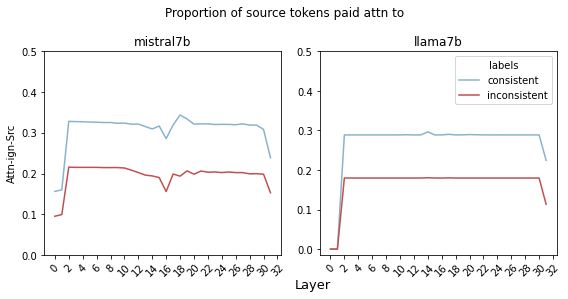

/tmp/ipykernel_2553/242100908.py:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='layer',
/tmp/ipykernel_2553/242100908.py:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='layer',


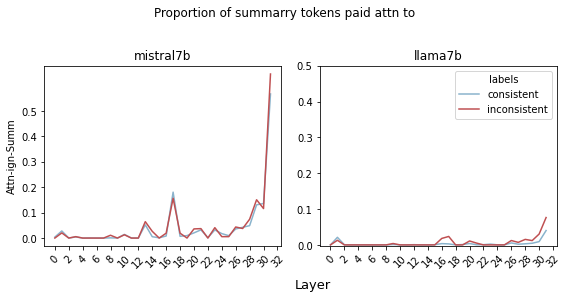

In [141]:
yticks = [i for i in [x * 0.1 for x in range(0,6)]]
viz_lineplot_attn_src(pd.concat([df_all_models_xsum, df_all_models_acibench]), yticks)
viz_lineplot_attn_summ(pd.concat([df_all_models_xsum, df_all_models_acibench]), yticks)


# yticks = [i for i in [x * 0.03 for x in range(0,6)]]
# viz_lineplot_attn_src(df_all_models_acibench, yticks)
# viz_lineplot_attn_summ(df_all_models_acibench)

In [61]:
pd.concat([df_all_models_xsum, df_all_models_acibench])

,Unnamed: 0,docid,tokid,layer,attn_ign_source,attn_ign_summ,attn_src_tgt,labels,models,model
0,0,XSUM-19389161:mistral7b-ul2,10823,0,0.203252,0.0,0.0,consistent,mistral7b,mistral7b
1,1,XSUM-19389161:mistral7b-ul2,10823,1,0.406504,0.0,0.0,consistent,mistral7b,mistral7b
2,2,XSUM-19389161:mistral7b-ul2,10823,2,0.406504,0.0,0.0,consistent,mistral7b,mistral7b
3,3,XSUM-19389161:mistral7b-ul2,10823,3,0.406504,0.0,0.0,consistent,mistral7b,mistral7b
4,4,XSUM-19389161:mistral7b-ul2,10823,4,0.406504,0.0,0.0,consistent,mistral7b,mistral7b
...,...,...,...,...,...,...,...,...,...,...
123803,123803,ACIBENCH-D2N126:llama7b-ul2,29889,27,0.142552,0.0,0.0,consistent,llama7b,llama7b
123804,123804,ACIBENCH-D2N126:llama7b-ul2,29889,28,0.142552,0.0,0.0,consistent,llama7b,llama7b
123805,123805,ACIBENCH-D2N126:llama7b-ul2,29889,29,0.142552,0.0,0.0,consistent,llama7b,llama7b
123806,123806,ACIBENCH-D2N126:llama7b-ul2,29889,30,0.142552,0.0,0.0,consistent,llama7b,llama7b
